In [1]:
from __future__ import print_function, division

# Statistical charts with the Seaborn library

`Seaborn` is a library written in the Python language which allows production of beautiful statistical plots with minimal coding required. 

It is part of the pandas, numpy and matplotlib ecosystem of data tools and best used together with IPython or even Jupyter notebooks, as is demonstrated here. Seaborn is best used as an exploratory tool; to get a quick feel of data. We find that Seaborn is best used as a tool to make compare distributions between categorical classes of data. 

In this talk, we will go through some of the capabilities of this library and some examples of its use in real life datasets. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import re
%matplotlib inline
mpl.style.use("ggplot")

## Straightforward API

Seaborn's visualizations are created by making a single function call with the appropriate customizations passed as arguments to the function. 

In [208]:
dataPath = os.path.join(os.getcwd(), "FiveCitiesPMData")
dataFiles = os.listdir(dataPath)

df_dict = {}
for f in dataFiles:
    df = pd.read_csv(os.path.join("FiveCitiesPMData", f), index_col=0)
    pm_cols = df.filter(regex="PM").columns
    id_cols = df.columns.difference(pm_cols)
    #print(pm_cols)
    df = df.melt(id_vars= id_cols, value_vars=pm_cols, var_name="Station", value_name="PM2.5Concentration")
    reg = re.search("\w+(?=PM)", f)
    city_name = reg.group(0)
    #print("Load {}".format(city_name))
    df_dict[city_name] = df

PM_dataset = pd.concat(df_dict, names=["City"])
PM_dataset.sample(5)

DEWP   HUMI  Iprec    Iws    PRES  TEMP cbwd  day  hour  \
City                                                                        
Guangzhou 135395  20.3  74.00    0.0  11.00   998.9  25.3   NE   13    11   
Beijing   143739   9.0  55.00    0.0   1.78   994.0  18.0   cv   27     3   
Shenyang  51951  -16.0  28.75    0.0  39.00  1029.0   0.0   NW    5    15   
          8313   -25.0  45.68    NaN  84.00  1032.0 -16.0   NE   13     9   
Beijing   100733  17.0  88.00    0.0  26.83  1006.0  19.0   NW   30     5   

                  month  precipitation  season  year          Station  \
City                                                                    
Guangzhou 135395      6            0.0     2.0  2013       PM_US Post   
Beijing   143739      5            0.0     1.0  2014  PM_Nongzhanguan   
Shenyang  51951      12            0.0     4.0  2015    PM_Taiyuanjie   
          8313       12            NaN     4.0  2010    PM_Taiyuanjie   
Beijing   100733      6            0.0     2.0  2015    PM_Dongsihuan   

                  PM2.5Concentration  
City                                  
Guangzhou 135395                36.0  
Beijing   143739                28.0  
Shenyang  51951                 17.0  
          8313                   NaN  
Beijing   100733                 5.0

Source : https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities

In [209]:
plot_df = PM_dataset.dropna()

The PM2.5 dataset comprises of PM2.5 readings from 5 cities in China. The task is to see how pollution levels are related to weather and environmental conditions. 

To start of with, we see that the readings are highly skewed with a median reading of about 50-100 $\mu g/m^3$.

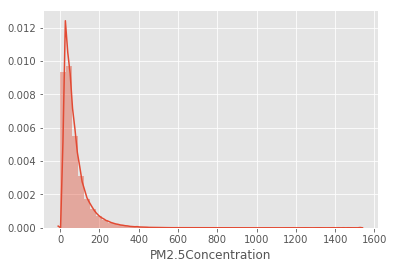

In [161]:
sns.distplot(plot_df["PM2.5Concentration"]);

It would be interesting to see how each individual monitoring station reports their readings. We see that the global median is quite representative of local conditions across China.   

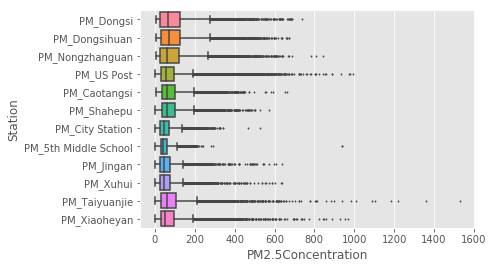

In [206]:
sns.boxplot(y="Station", x="PM2.5Concentration", data=plot_df, fliersize=1, saturation=1);

How about across the years? Same story here. Pollution levels and seasonal variation within each years has not changed much. 

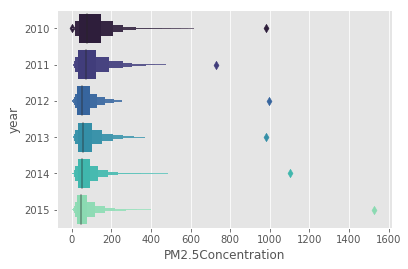

In [210]:
sns.lvplot(y="year", x="PM2.5Concentration", data=plot_df, orient="h", saturation=1,
          palette="mako", outlier_prop=1e-8);

Here, we use some pandas data manipulation before we use seaborn to visualize PM2.5 distributions across different cities. Firstly as seen from previous charts, we apply a log transformation symmetrize the distribution. We also restrict the readings to the US Post monitoring station in each city. 

A violinplot produces a non-parametric smoothing of the distribution. However, it is computationally expensive and hence not recommended for datasets with large instances. 

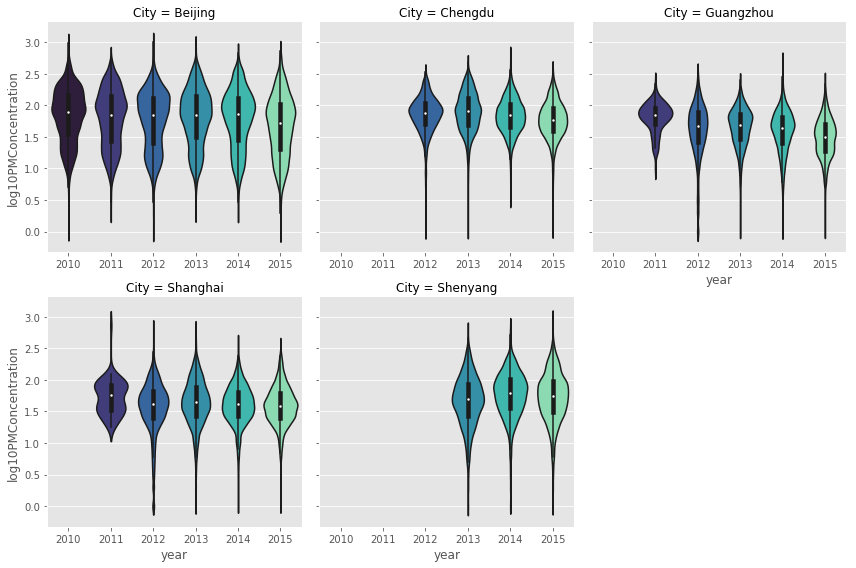

In [211]:
plot_uspost_readings = (plot_df[plot_df.Station == "PM_US Post"]
                         .reset_index("City")
                         .assign(log10PMConcentration=lambda df: np.log10(df["PM2.5Concentration"])))

sns.factorplot("year", "log10PMConcentration", data=plot_uspost_readings,
               col="City", col_wrap=3, kind="violin", palette="mako", sharex=False,
              saturation=1);

Here is another dataset. Concrete compressive strength as a function of various inputs. 

In [29]:
concrete = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
concrete.columns = [re.search("[\w\s]+(?=\()", col_name).group(0).strip() for col_name in concrete.columns]
print(concrete.columns)
concrete.head()

Index([u'Cement', u'Blast Furnace Slag', u'Fly Ash', u'Water',
       u'Superplasticizer', u'Coarse Aggregate', u'Fine Aggregate', u'Age',
       u'Concrete compressive strength'],
      dtype='object')


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Source : https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Let's see how compressive strength depends on cement density ($kg/m^3$). Seaborn can easiy produce a scatter plot and a linear model with a slightly translucent band showing the confidence interval of the estimated linear model.  

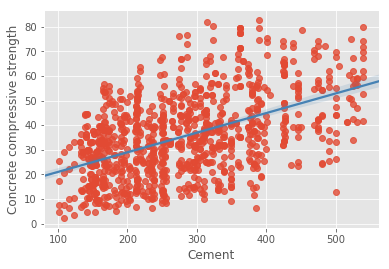

In [4]:
sns.regplot("Cement", "Concrete compressive strength", data=concrete, robust=True, line_kws={"color": "steelblue"})

If we color each marker with their respective ages, we see that age influences the dependance of strength of cement density in a nonlinear manner. 

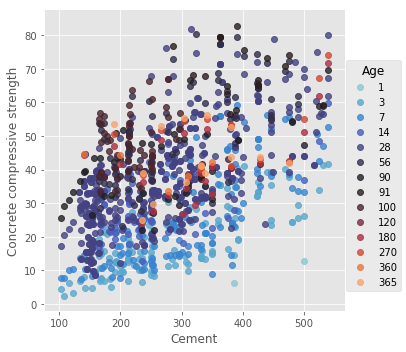

In [5]:
sns.lmplot("Cement", "Concrete compressive strength", concrete, hue="Age", palette="icefire", fit_reg=False)

A correlation chart for each numerical variable in this dataset is obtained using `pairplot`. Use of this chart allows us a global overview of the relationships between each numerical variable in this dataset. 

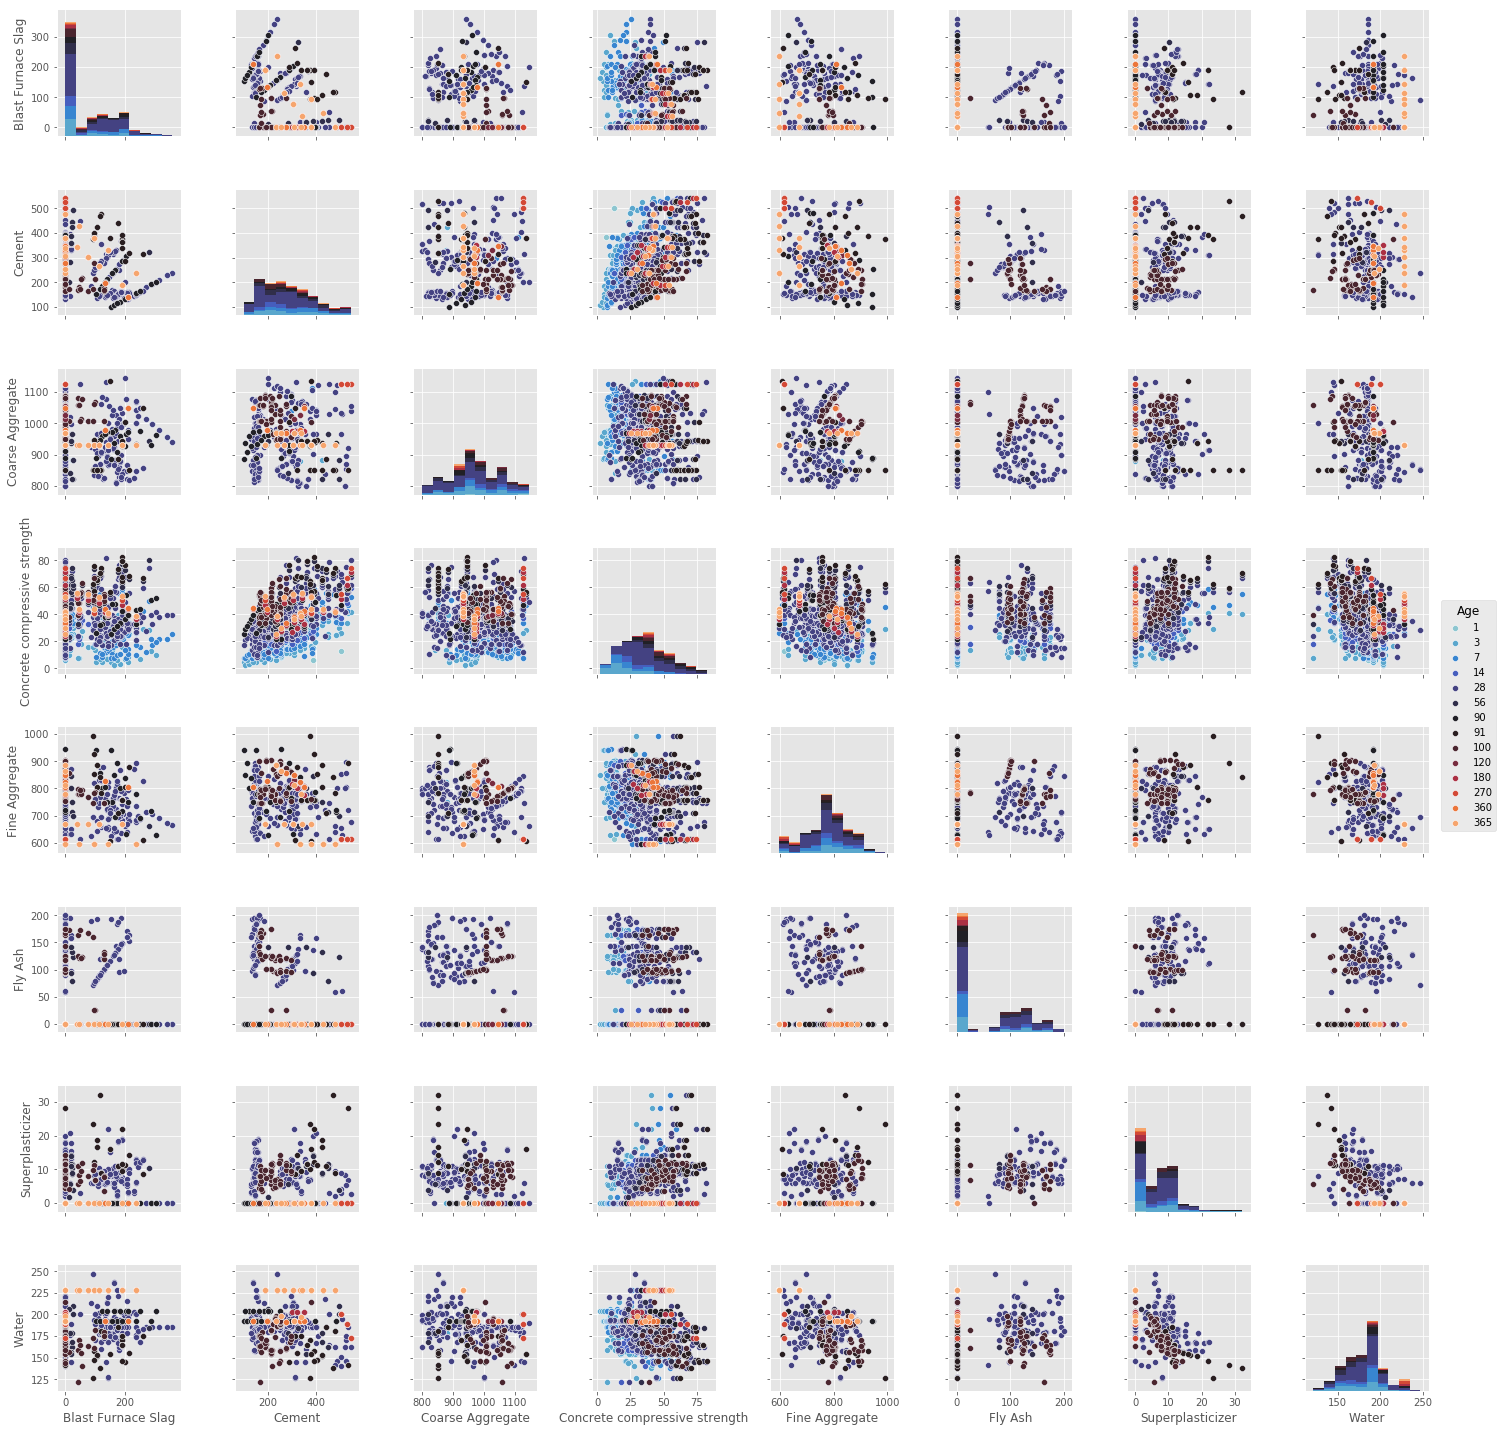

In [30]:
cols = concrete.columns.difference(["Age"])
g = sns.pairplot(concrete, hue="Age", x_vars=cols, y_vars=cols, palette="icefire")


In [31]:
g.fig.savefig("pairplot.jpeg", dpi=300)

## Interaction with `matplotlib`

Seaborn is a high level interface to matplotlib. Hence, we can use matplotlib to further customize Seaborn visualizations. 

In [2]:
online_retail = pd.read_excel(os.path.join(os.getcwd(), "Online_Retail.xlsx"))
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Source: https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [3]:
online_retail.dropna()
online_retail["TotalSales"] = online_retail["Quantity"]*online_retail["UnitPrice"]

def make_yearmonth_col(x):
    if x.month >=10:
        return "%d-%d" % (x.year, x.month)
    else:
        return "%d-0%d" % (x.year, x.month)

online_retail["YearMonth"] = online_retail["InvoiceDate"].apply(make_yearmonth_col)

plot_df = (online_retail
            .query("TotalSales > 0")
            .groupby(["Country", "YearMonth", "InvoiceNo"], as_index=False)
            .agg({"TotalSales": np.sum, "Quantity": np.sum}))

This dataset is a record of transnational transactions from a UK based online retail. Let's produce a chart indicating total sales suitable for let's say, a sales review. By using matplotlib, we can customize the default seaborn visualization to give it that extra polish.    

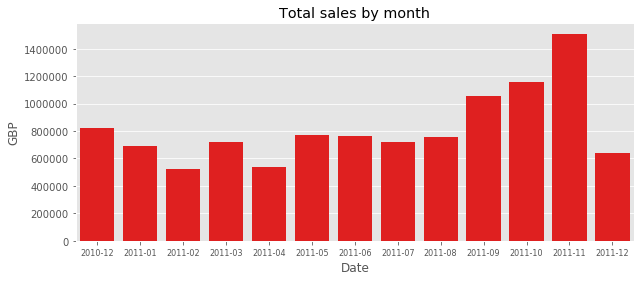

In [25]:
fig1, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_title("Total sales by month")
sns.barplot("YearMonth", "TotalSales", data=plot_df, estimator=np.sum, ci=None, color="red")
plt.setp(ax.get_xticklabels(), fontsize=8)
ax.set_xlabel("Date")
ax.set_ylabel("GBP");

Note the build up of sales leading up to December. 

This chart below compares sales volume from different countries by plotting sales volume on a log scale on the x-axis. It perhaps not surprising that the United Kingdom leads the pack. 

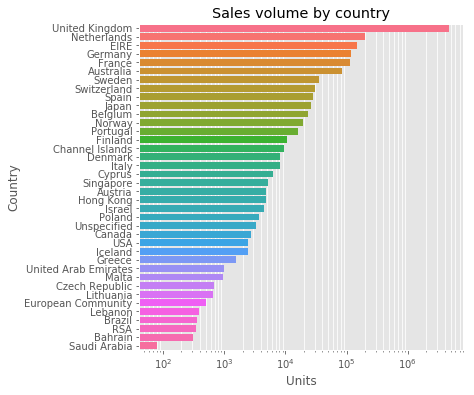

In [10]:
from matplotlib import ticker

fig2 = plt.figure(figsize=(9, 6))
fig2.subplots_adjust(left=0.4)
ax = fig2.add_subplot(111)
ax.set_title("Sales volume by country")
ax.set_ylabel("Country")
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(numticks=10))
ax.grid(which="both", axis="x")

(plot_df
    .groupby("Country", as_index=False)
    .agg({"Quantity": np.sum})
    .sort_values(by="Quantity", ascending=False)
    .pipe((sns.barplot, "data"), y="Country", x="Quantity", saturation=1, palette="husl", ax=ax))

ax.set_xlabel("Units")
#fig2.savefig("country_sales_volume.jpeg", dpi=300);

This chart illustrates nicely how pandas, matplotlib and seaborn interact together. 

We used pandas to create a column of total sales volume by country and a column of taking the log of the sales volume. Matplotlib was used to adjust the default axes titles and tick labels. We also wrap the plotting of the barchart as the final stage of the pandas data processing pipeline. 

